In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import os

# Step 1: Create a new SQLite database 
db_file = "sales_data1.db"
if os.path.exists(db_file):
    os.remove(db_file) 
conn = sqlite3.connect(db_file)
cursor = conn.cursor()

In [5]:
# Step 2: Create a simple sales table
cursor.execute("""
CREATE TABLE sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

In [6]:
# Step 3: Insert some sample data
sample_data = [
    ("Laptop", 3, 50000),
    ("Laptop", 2, 52000),
    ("Phone", 5, 15000),
    ("Phone", 7, 16000),
    ("Headphones", 10, 2000),
    ("Headphones", 15, 1800),
    ("Tablet", 4, 25000),
    ("Tablet", 3, 24000)
]

cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)
conn.commit()

In [7]:
# Step 4: Run SQL query to aggregate data
query = """
SELECT 
    product, 
    SUM(quantity) AS total_qty, 
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""
df = pd.read_sql_query(query, conn)


Sales Summary:
      product  total_qty   revenue
0  Headphones         25   47000.0
1      Laptop          5  254000.0
2       Phone         12  187000.0
3      Tablet          7  172000.0


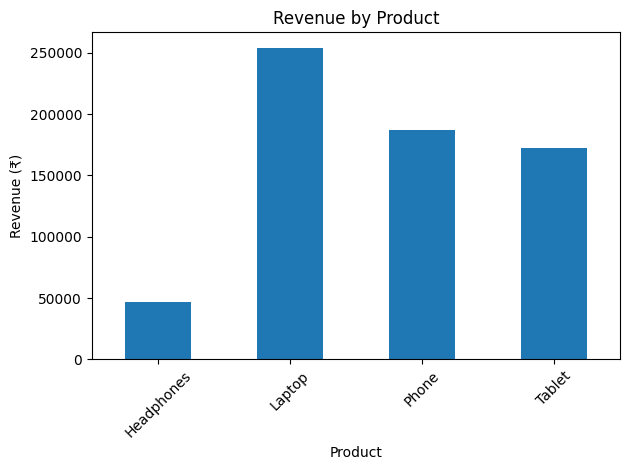

In [8]:
# Step 5: Display results
print("Sales Summary:")
print(df)

# Step 6: Plot bar chart of revenue by product
df.plot(kind='bar', x='product', y='revenue', legend=False)
plt.title("Revenue by Product")
plt.ylabel("Revenue (₹)")
plt.xlabel("Product")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [10]:
# Save chart as image
#import matplotlib.pyplot as plt
plt.savefig("sales_chart1.png")

# Close connection
conn.close()

<Figure size 640x480 with 0 Axes>